**(2021-22 BNM832) Big Data for Decision Making Individual Assignment**

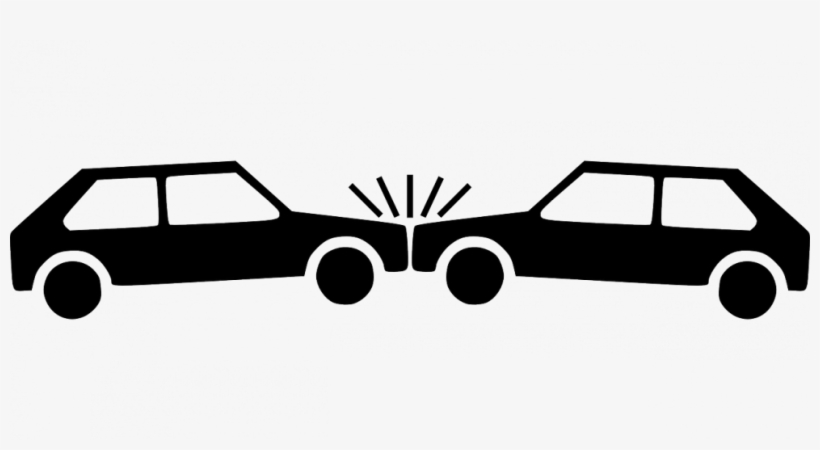

# Accident Severity Prediction Using Classification

In the group assignment, the UK Road Safety Dataset underwent the following :

1. The data was preprocessed
2. A new feature dataframe was created
3. The new dataframe was split for training & testing
4. Data imputation was done 
5. Exploratory analysis of the features
6. One hot encoding 

#### **Table of Contents**
1. Importing Libraries and Preparing Environment
2. Business Objective
3. Data Loading
4. Variable Correlations
5. Feature selection
6. Scaling
7. Model Building
8. Training and Evaluating the Models
9. Hyperparameter Tuning
10. Evaluating the Test Dataset
11. Conclusions
12. Future Improvements

### **1.0 Importing Essential Libraries and Preparing Environment**

In [ ]:
# Base Libraries
import re
import time 
import numpy as np
import pandas as pd
import statistics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings(action='ignore')

# Library for Plotting
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline

# Library for Google Colab
from google.colab import drive
# I  used google colab as I found it more convenient

In [ ]:
# Mount Google Drive on kernel
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/Colab Notebooks/Content"

Mounted at /content/gdrive


In [ ]:
Start_time = time.time()

### **2.0 Business Objective**

Most car accident in the UK occur on high speed motorways in the countryside that are far from any hospital or emergency services reach. As a consequence, many chronic injuries are sustained, along with loss of life. Most injuries incured in car accidents can be prevented if proper care relief is provided at the right time.
In times of multiple car accident crashes in the vicinity of the nearest emergency service, the aid has only a limited number of resources, which cannot practically be disperesed to each accident site. A situation like this requires priority based response.

The objective of this project is to predict accident severity accurately based on predictor variables that can be obtained from the site of crash. The severity rating can then be used to prioritise dispatch of response team and organize first aid resources accordingly.

### **3.0 Data Loading**

At the end of the group assignment, four dataframes were created, one for the train datasets and another one for the test dataset. Each set was split into two dataframes, one for the dependent variable y and the other one for the independent variable x.

In [ ]:
# Loading .csv files into dataframes
x_train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Content/x_accident_train.csv", index_col=0)
y_training = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Content/y_accident_train.csv", index_col=0)
x_test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Content/x_accident_test.csv", index_col=0)
y_testing = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Content/y_accident_test.csv", index_col=0)

The train dataset's shape and types of their variables are analysed:

In [ ]:
y_train = y_training["accident_severity"]
y_test = y_testing["accident_severity"]

In [ ]:
x_train.head()

,speed_limit,age_of_vehicle,engine_capacity_cc,latitude,longitude,first_point_of_impact_1,first_point_of_impact_2,first_point_of_impact_3,first_point_of_impact_4,trunk_road_flag_2,...,second_road_class_2,second_road_class_3,second_road_class_4,second_road_class_5,second_road_class_6,sex_of_casualty_2,sex_of_driver_2,did_police_officer_attend_scene_of_accident_2,casualty_severity_2,casualty_severity_3
0,60.0,4.0,1499.0,52.495285,0.580066,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,30.0,16.0,1598.0,51.168324,-0.176178,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,40.0,6.0,1398.0,52.491563,-0.722810,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40.0,8.0,1560.0,51.513778,-2.694186,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.0,8.0,1560.0,51.382694,1.375307,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


The dataframe is in this manner due to the usage of One hot encoding during the group assignment

In [ ]:
print(x_train.shape)
print(y_train.shape)

(64674, 101)
(64674,)


In [ ]:
x_train.head()

,speed_limit,age_of_vehicle,engine_capacity_cc,latitude,longitude,first_point_of_impact_1,first_point_of_impact_2,first_point_of_impact_3,first_point_of_impact_4,trunk_road_flag_2,...,second_road_class_2,second_road_class_3,second_road_class_4,second_road_class_5,second_road_class_6,sex_of_casualty_2,sex_of_driver_2,did_police_officer_attend_scene_of_accident_2,casualty_severity_2,casualty_severity_3
0,60.0,4.0,1499.0,52.495285,0.580066,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,30.0,16.0,1598.0,51.168324,-0.176178,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
2,40.0,6.0,1398.0,52.491563,-0.722810,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40.0,8.0,1560.0,51.513778,-2.694186,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,30.0,8.0,1560.0,51.382694,1.375307,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### **4.0 Variable Correlations**

An analysis is done to find out which variables have a correlation with the target variable "accident_severity". Pearson's r-correlation technique will be used and the correlation coefficients will be sorted from strongest to weakest.

In [ ]:
corr_matrix = x_train.corrwith(y_train, axis=0,  method='pearson')
corr_matrix[y_train].sort_values(ascending=False)

age_of_vehicle    0.002977
age_of_vehicle    0.002977
age_of_vehicle    0.002977
age_of_vehicle    0.002977
age_of_vehicle    0.002977
                    ...   
latitude         -0.001069
latitude         -0.001069
latitude         -0.001069
latitude         -0.001069
latitude         -0.001069
Length: 64674, dtype: float64

### **5.0 Feature selection**

After analyzing the correlations between the features, the following features are dropped due to low correlation scores.

In [ ]:
x_train = x_train.drop(['latitude', 'longitude','vehicle_location_restricted_lane_6',

                       'age_band_of_casualty_6', 'vehicle_location_restricted_lane_3',

                       'speed_limit', 'driver_imd_decile_6', 'vehicle_leaving_carriageway_8',

                       'driver_imd_decile_5', 'weather_conditions_3', 'age_band_of_casualty_3',

                       'junction_location_1', 'first_point_of_impact_4', 'driver_imd_decile_9',

                       'driver_imd_decile_3', 'junction_location_9', 'trunk_road_flag_2', 

                       'age_of_vehicle', 'light_conditions_7', 'driver_imd_decile_4', 

                       'vehicle_leaving_carriageway_3', 'skidding_and_overturning_2', 

                       'weather_conditions_2'], axis=1)

x_test = x_test.drop(['latitude', 'longitude','vehicle_location_restricted_lane_6',

                       'age_band_of_casualty_6', 'vehicle_location_restricted_lane_3',

                       'speed_limit', 'driver_imd_decile_6', 'vehicle_leaving_carriageway_8',

                       'driver_imd_decile_5', 'weather_conditions_3', 'age_band_of_casualty_3',

                       'junction_location_1', 'first_point_of_impact_4', 'driver_imd_decile_9',

                       'driver_imd_decile_3', 'junction_location_9', 'trunk_road_flag_2', 

                       'age_of_vehicle', 'light_conditions_7', 'driver_imd_decile_4', 

                       'vehicle_leaving_carriageway_3', 'skidding_and_overturning_2', 

                       'weather_conditions_2'], axis=1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(64674, 78)
(27718, 78)


### **6.0 Scaling**

The dataset is standardized to improve the performance of the models. The original values of the target variable is kept.

The training dataset is then scaled.


In [ ]:
# importing standard scaler libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit_transform returns Numpy array, so it needs to be put it back into dataframe
scaled = scaler.fit_transform(x_train)
scaled_train = pd.DataFrame(scaled, columns=x_train.columns)

In [ ]:
# Scaled training dataset
scaled_train.head()

,engine_capacity_cc,first_point_of_impact_1,first_point_of_impact_2,first_point_of_impact_3,urban_or_rural_area_2,age_band_of_casualty_2,age_band_of_casualty_4,age_band_of_casualty_5,age_band_of_casualty_7,age_band_of_casualty_8,...,second_road_class_2,second_road_class_3,second_road_class_4,second_road_class_5,second_road_class_6,sex_of_casualty_2,sex_of_driver_2,did_police_officer_attend_scene_of_accident_2,casualty_severity_2,casualty_severity_3
0,-0.120908,-1.052266,-0.449204,-0.39983,1.173652,-0.155817,-0.344241,-0.36112,-0.418578,-0.397564,...,-0.023269,-0.31092,-0.203797,-0.150638,-0.778876,1.273240,1.499439,-0.606256,-0.470132,0.492552
1,-0.023230,-1.052266,-0.449204,-0.39983,-0.852042,-0.155817,-0.344241,-0.36112,2.389044,-0.397564,...,-0.023269,-0.31092,-0.203797,-0.150638,1.283901,1.273240,-0.666916,-0.606256,-0.470132,0.492552
2,-0.220559,-1.052266,2.226162,-0.39983,-0.852042,-0.155817,-0.344241,-0.36112,-0.418578,-0.397564,...,-0.023269,-0.31092,-0.203797,-0.150638,1.283901,-0.785398,-0.666916,-0.606256,2.127061,-2.030242
3,-0.060722,0.950330,-0.449204,-0.39983,1.173652,-0.155817,-0.344241,-0.36112,-0.418578,-0.397564,...,-0.023269,-0.31092,-0.203797,-0.150638,-0.778876,-0.785398,-0.666916,-0.606256,-0.470132,0.492552
4,-0.060722,0.950330,-0.449204,-0.39983,-0.852042,-0.155817,-0.344241,-0.36112,-0.418578,-0.397564,...,-0.023269,-0.31092,-0.203797,-0.150638,-0.778876,1.273240,-0.666916,-0.606256,-0.470132,0.492552


The testing dataset is also scaled.

In [ ]:
# importing standard scaler libraries
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit_transform returns a Numpy array, so we need to put it back into dataframe

scaled = scaler.fit_transform(x_test)
scaled_test = pd.DataFrame(scaled, columns=x_test.columns)

In [ ]:
# Scaled testing dataset
scaled_test.head()

,engine_capacity_cc,first_point_of_impact_1,first_point_of_impact_2,first_point_of_impact_3,urban_or_rural_area_2,age_band_of_casualty_2,age_band_of_casualty_4,age_band_of_casualty_5,age_band_of_casualty_7,age_band_of_casualty_8,...,second_road_class_2,second_road_class_3,second_road_class_4,second_road_class_5,second_road_class_6,sex_of_casualty_2,sex_of_driver_2,did_police_officer_attend_scene_of_accident_2,casualty_severity_2,casualty_severity_3
0,0.836305,-1.054976,-0.447117,-0.394877,-0.851054,-0.158706,-0.349681,-0.360951,-0.413484,-0.403019,...,-0.02248,-0.308659,-0.200577,-0.15151,-0.779179,-0.781992,-0.662288,-0.616525,-0.475821,0.49709
1,-0.603641,0.947889,-0.447117,-0.394877,1.175014,-0.158706,-0.349681,-0.360951,-0.413484,-0.403019,...,-0.02248,-0.308659,-0.200577,-0.15151,-0.779179,-0.781992,-0.662288,-0.616525,-0.475821,0.49709
2,-0.064501,0.947889,-0.447117,-0.394877,-0.851054,-0.158706,-0.349681,-0.360951,-0.413484,-0.403019,...,-0.02248,-0.308659,-0.200577,-0.15151,-0.779179,-0.781992,-0.662288,-0.616525,-0.475821,0.49709
3,-0.029965,0.947889,-0.447117,-0.394877,1.175014,-0.158706,-0.349681,-0.360951,2.418476,-0.403019,...,-0.02248,-0.308659,-0.200577,-0.15151,-0.779179,-0.781992,-0.662288,-0.616525,2.101629,-2.01171
4,-0.252529,-1.054976,2.236552,-0.394877,-0.851054,-0.158706,-0.349681,-0.360951,-0.413484,-0.403019,...,-0.02248,-0.308659,-0.200577,-0.15151,1.283402,-0.781992,-0.662288,1.621993,-0.475821,0.49709


### **7.0 Model Building**

For the purpose of building a machine learnig model, five algorithms are chosen and they will be trained on the training dateset and their results will be compared before picking the best ones to evaluate on the test dataset.

These are the chosen algorithms:

1. Naïve Bayes Algorithm
2. XGBoost Classifier
3. Support Vector Machine
4. K Nearest Neighbour
5. Logistic Regression


#### **7.1  Baseline**

The baseline for the project is calculated using micro-averaging where precision, recll and F-score are evaluated in each class seperately and then averaged across classes.

For the "Slight (3)" label, the accuracy measures will be : 

Precision: ((True Positive)/((True Positive) + (False Posititve))) : 48868/64674 = 0.7556

Recall: ((True Positive)/((True Positive) + (False Negative))) : 48868/48868 = 1.0

F-score: 2/(1/precision + 1/recall) = 0.86

Therefore, the baseline is 0.86.

### **8.0 Training and Evaluating the Models**

The models are evaluated using training data and the model with the best results are used to evaluate the test data

**8.1 Naïve Bayes Algorithm**

In [ ]:
# Importing Library
from sklearn.naive_bayes import GaussianNB

model1 = GaussianNB()
model1.fit(x_train, y_train)
print("Naïve Bayes Model fitting completed.\n")

print("Train Set Prediction:\n")

print('*_'*20+ "Naïve Bayes Algorithm" +'_*'*20)
model = model1
y_pred = model.predict(x_train)
arg_test = {'y_true':y_train, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

Naïve Bayes Model fitting completed.

Train Set Prediction:

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_Naïve Bayes Algorithm_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
[[  811   397   168]
 [ 2428  9549  2453]
 [ 4574   326 43968]]
              precision    recall  f1-score   support

           1       0.10      0.59      0.18      1376
           2       0.93      0.66      0.77     14430
           3       0.94      0.90      0.92     48868

    accuracy                           0.84     64674
   macro avg       0.66      0.72      0.62     64674
weighted avg       0.92      0.84      0.87     64674



**8.2 XGBoost Classifier**

In [ ]:
# Importing Library
import xgboost

model2 = xgboost.XGBClassifier()
model2.fit(x_train, y_train)
print("XGBoost Classifier Model fitting completed.\n")

print("Train Set Prediction:\n")

print('*_'*20+ "XGBoost Classifier" +'_*'*20)
model = model2
y_pred = model.predict(x_train)
arg_test = {'y_true':y_train, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

XGBoost Classifier Model fitting completed.

Train Set Prediction:

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_XGBoost Classifier_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
[[  920   227   229]
 [    0 11481  2949]
 [    0     0 48868]]
              precision    recall  f1-score   support

           1       1.00      0.67      0.80      1376
           2       0.98      0.80      0.88     14430
           3       0.94      1.00      0.97     48868

    accuracy                           0.95     64674
   macro avg       0.97      0.82      0.88     64674
weighted avg       0.95      0.95      0.94     64674



**8.3 Support Vector Machine**

In [ ]:
 # Importing Library
from sklearn.svm import SVC

model3 = SVC(kernel = 'sigmoid', gamma='scale')
model3.fit(x_train, y_train)
print("Support Vector Machine Model fitting completed.\n")

print("Train Set Prediction:\n")

print('*_'*20+ "Support Vector Machine Model" +'_*'*20)
model = model3
y_pred = model.predict(x_train)
arg_test = {'y_true':y_train, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

Support Vector Machine Model fitting completed.

Train Set Prediction:

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_Support Vector Machine Model_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
[[   97   240  1039]
 [  365  2785 11280]
 [ 1031 10518 37319]]
              precision    recall  f1-score   support

           1       0.06      0.07      0.07      1376
           2       0.21      0.19      0.20     14430
           3       0.75      0.76      0.76     48868

    accuracy                           0.62     64674
   macro avg       0.34      0.34      0.34     64674
weighted avg       0.62      0.62      0.62     64674



**8.4 K Nearest Neighbour**

In [ ]:
# Importing Library
from sklearn.neighbors import KNeighborsClassifier

model4 = KNeighborsClassifier()
model4.fit(x_train, y_train)
print("K Nearest Neighbour Model fitting completed.\n")

print("Train Set Prediction:\n")

print('*_'*20+ "K Nearest Neighbour" +'_*'*20)
model = model4
y_pred = model.predict(x_train)
arg_test = {'y_true':y_train, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

K Nearest Neighbour Model fitting completed.

Train Set Prediction:

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_K Nearest Neighbour_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
[[  443   323   610]
 [   58 11224  3148]
 [   30   308 48530]]
              precision    recall  f1-score   support

           1       0.83      0.32      0.46      1376
           2       0.95      0.78      0.85     14430
           3       0.93      0.99      0.96     48868

    accuracy                           0.93     64674
   macro avg       0.90      0.70      0.76     64674
weighted avg       0.93      0.93      0.93     64674



**8.5 Logistic Regression**

In [ ]:
# Importing Library
from sklearn.linear_model import LogisticRegression

model5 = LogisticRegression()
model5.fit(x_train, y_train)
print("Logistic Regression Model fitting completed.\n")

print("Train Set Prediction:\n")

print('*_'*20+ "Logistic Regression" +'_*'*20)
model = model5
y_pred = model.predict(x_train)
arg_test = {'y_true':y_train, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

Logistic Regression Model fitting completed.

Train Set Prediction:

*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_Logistic Regression_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
[[   32  1080   264]
 [    0 11480  2950]
 [    3     0 48865]]
              precision    recall  f1-score   support

           1       0.91      0.02      0.05      1376
           2       0.91      0.80      0.85     14430
           3       0.94      1.00      0.97     48868

    accuracy                           0.93     64674
   macro avg       0.92      0.61      0.62     64674
weighted avg       0.93      0.93      0.92     64674



From the five model which were evaluated, the XGBoost Classifier had the best results and is chosen as the model to evaulate the test dataset.

### **9.0 Hyperparameter Tuning**

The model has displayed a high level of accuracy but it can be improved further by using Hyperparameter Tuning.

The hyperparameters are tuned using the random search method. For that, we’ll use the sklearn library, which provides a function specifically for this purpose: RandomizedSearchCV.

In [ ]:
# Importing necessary libraries
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
              'num_class': [10]
              }

xgbclf = xgb.XGBClassifier(objective="multi:softmax", tree_method='hist')
clf = RandomizedSearchCV(estimator=xgbclf,
                        param_distributions=params,
                        scoring='accuracy',
                        n_iter=25,
                        n_jobs=4,
                        verbose=1)

clf.fit(x_train, y_train)




Fitting 5 folds for each of 25 candidates, totalling 125 fits


After this, the tuned model is evaluated again using the training data.

In [ ]:
print('*_'*20+ "XGBoost Classifier" +'_*'*20)
model = clf
y_pred = model.predict(x_train)
arg_test = {'y_true':y_train, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

The results shows that there has been a slight increase in the accuracy of the model from 95 percent to 97 percent.

### **10. Evaluating the Test Dataset**

The XGBoost Classifier Model which has been tuned using RandomizedSearchCV is used to evaluvate the test dataset and the results are cross-validated.

In [ ]:
print("Test Set Prediction for XGBoost Classifier:\n")

print('*_'*20+ "XGBoost Classifier" +'_*'*20)
model = clf
y_pred = model.predict(x_test)
arg_test = {'y_true':y_test, 'y_pred':y_pred}
print(confusion_matrix(**arg_test))
print(classification_report(**arg_test))

**Cross-validation:**

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))
print("")
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

### **11. Conclusion**

This individual project was successful in implementing and evaluating several alternative models to address the business problem selected in the group assignment.

The baseline for the models was calculated and the training data was evaluated using five different classification algorithms.

Out of the various models that were evaluated the XGBoost Classifier had the best results when it was evaluated using training data.

The selected model was then made more accurate using hyperparameter tuning function called RandomSearchCV.


### **12. Possible Future Improvements and Business Scenarios**